In [57]:
from IPython.display import display, Image

# Understanding Prompt Technique

- **Standard Prompt (SP)**
- **Unstructured Chain-of-Thought (UST-CoT)**
- **Structured Chain-of-Thought (ST-CoT)**
- **Tree of Thoughts (ToT)**
- **Financial Chain-of-Thought (FinCoT)**

## Standard Prompting (SP) 

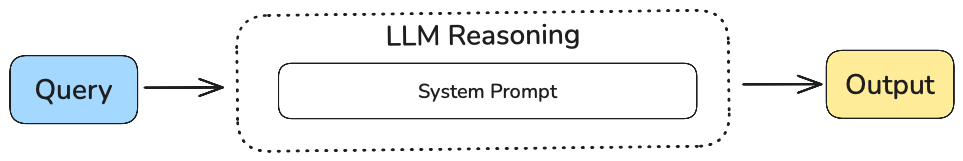

In [58]:
display(Image(filename="images/intro/SP.png"))

Refers to the baseline technique of simply appending a natural language question to an LLM, without providing any intermediate \texttt{`thinking'} steps or structured reasoning. This is known as zero-shot prompting, where the model must generate an answer based solely on the prompt.

##  Unstructured Chain-of-Thought (UST-CoT)

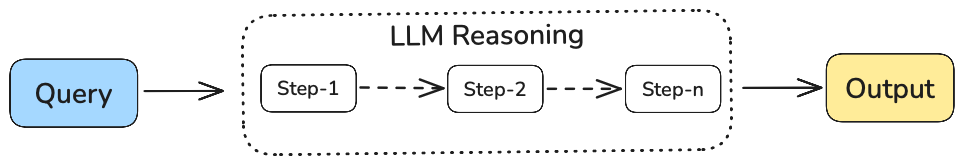

In [59]:
display(Image(filename="images/intro/UST_CoT.png"))

Decompose reasoning into intermediate steps, encouraging the model to `think` before finalizing an answer.

## Structured Chain-of-Thought (ST-CoT)

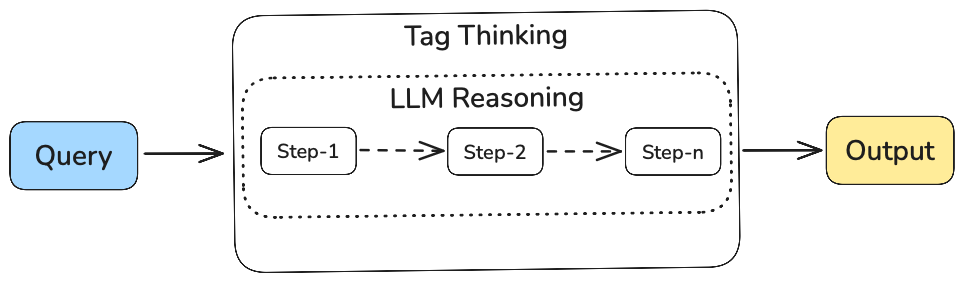

In [60]:
display(Image(filename="images/intro/ST_CoT.png"))

Template-driven prompts characterized by unique tags have proven effective in organizing the output of large-language models (LLMs). This approach, which we term Structured Chain-of-Thought (ST-CoT), employs specific tags such as `<thinking>` and `<output>` to separate the model's reasoning process into clear stages.

## Tree of Thoughts (ToT)

### Best-First Search (BFS)

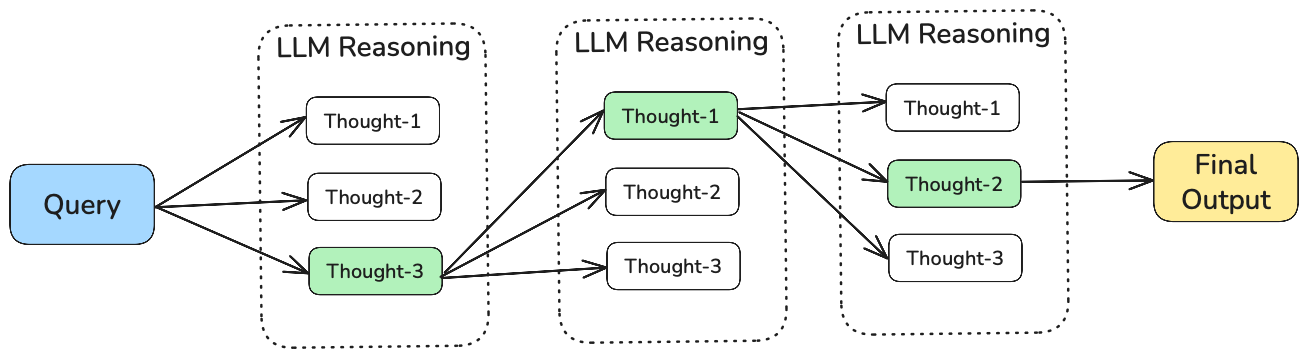

In [61]:
display(Image(filename="images/intro/ToT_BFS.png"))

The model explores one complete reasoning path deeply before backtracking to try alternative paths. It’s memory-efficient but may miss better paths found early in the tree.

### Depth-First Search (DFS)

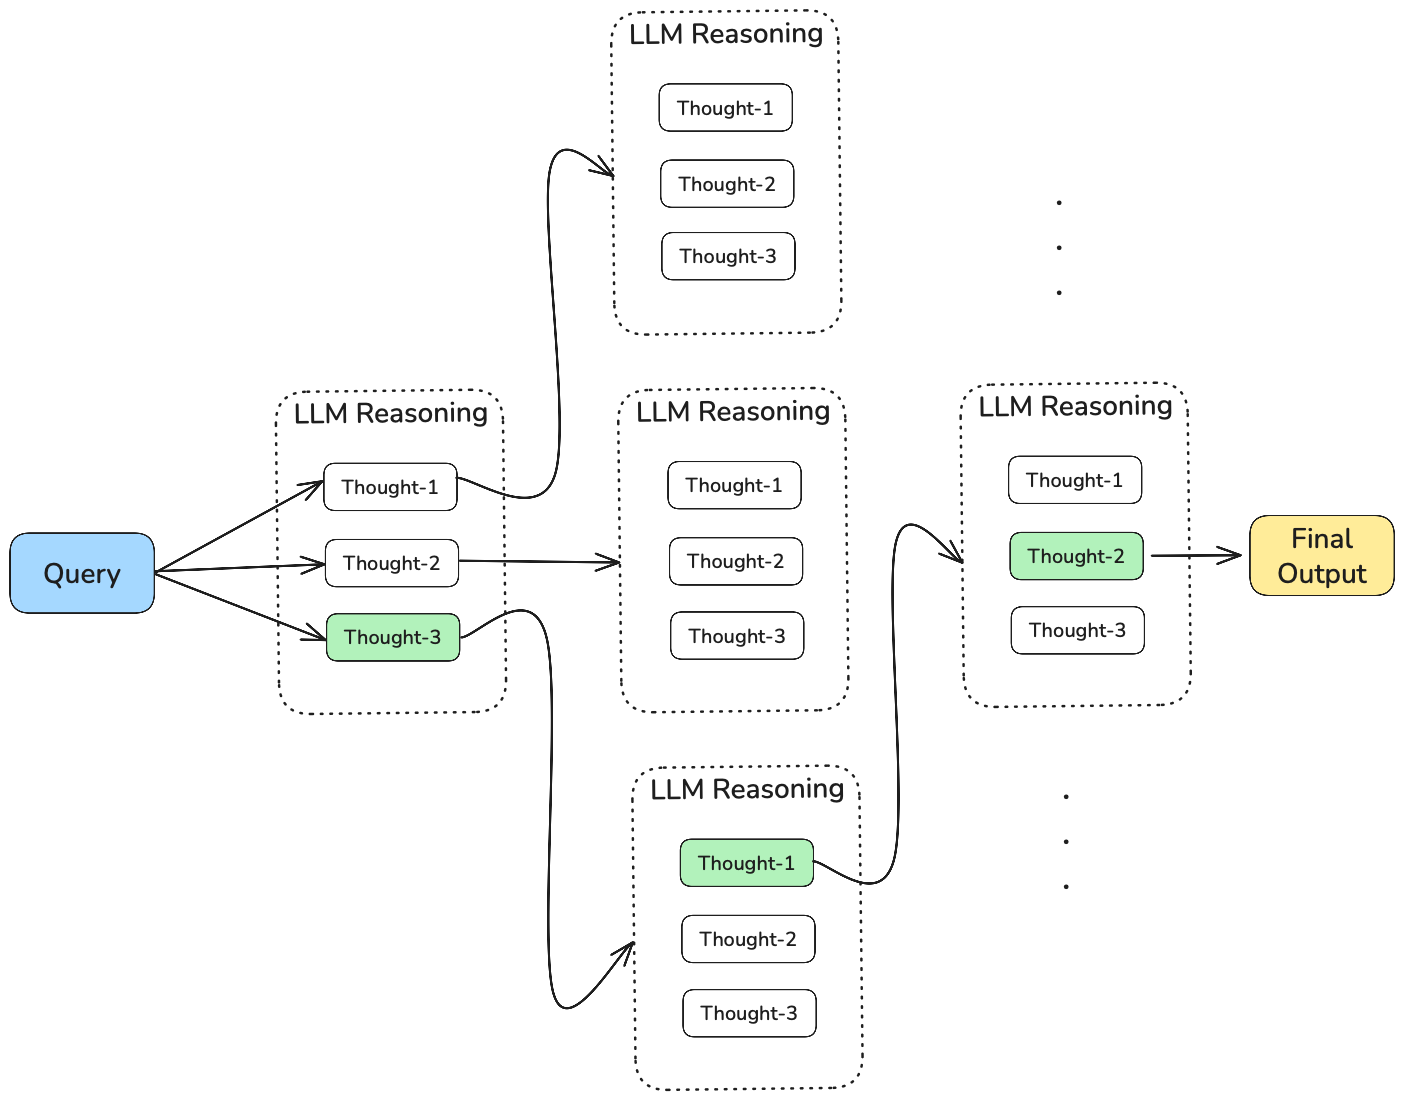

In [62]:
display(Image(filename="images/intro/ToT_DFS.png"))

The model evaluates all partial thoughts at each level before expanding further. This allows for global comparison and better path selection but requires more memory. https://github.com/dave1010/tree-of-thought-prompting

## FinCoT

ref:  https://arxiv.org/abs/2506.16123

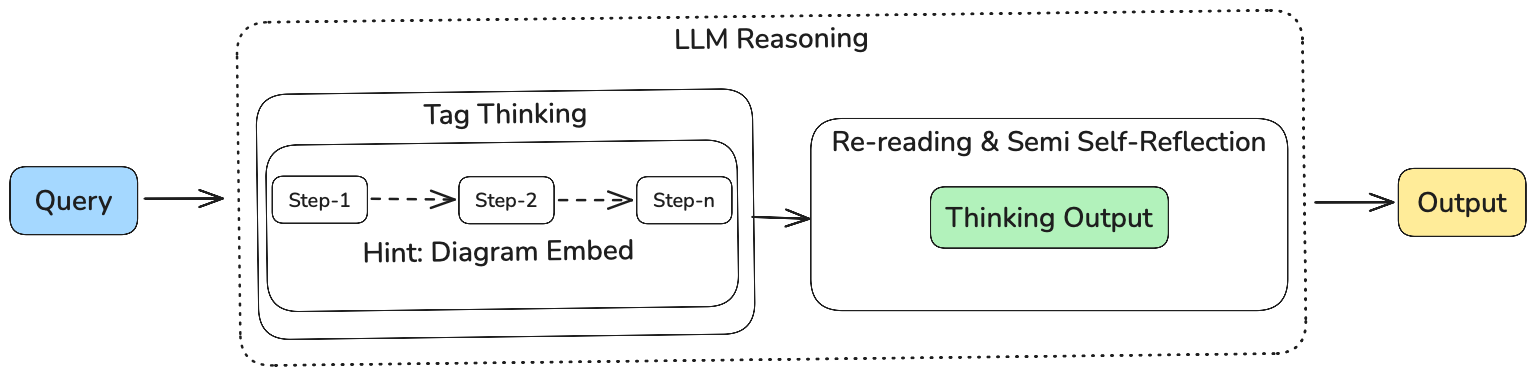

In [63]:
display(Image(filename="images/intro/FinCoT.png"))

FinCoT (Financial Chain-of-Thought) is a structured prompting framework that enhances LLM reasoning in specialized financial domains. Building upon ST-CoT approaches, FinCoT explicitly embeds expert-derived problem-solving methodologies directly into prompts, guiding LLMs to follow domain-specific reasoning pathways without requiring model fine-tuning. 

### Get embeds expert-derived problem-solving

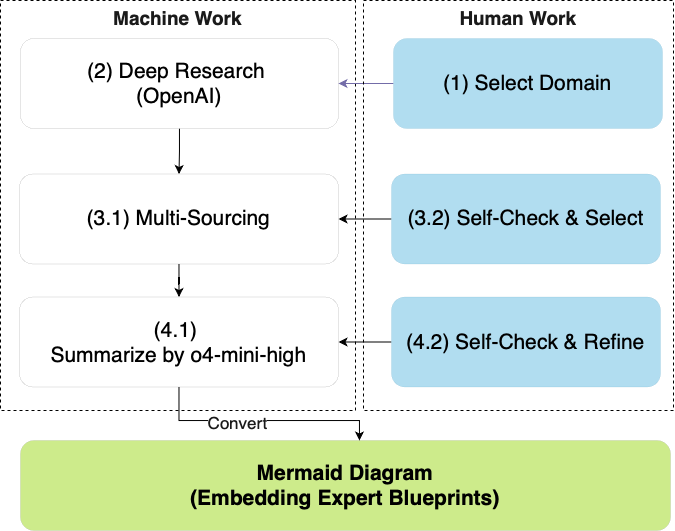

In [64]:
display(Image(filename="images/intro/FinCoT_Pipeline.png"))

#### Steps
**Step 1: Scope Definition and Knowledge Aggregation**  
   The target CFA domain is scoped (e.g., Economics focusing on supply/demand), and relevant expert strategies are aggregated, primarily using Deep Research, from diverse authoritative sources.  (If you are not subscribed GPT you can use Typhoon here: https://opentyphoon.ai/research )

**Step 2: Validation and Synthesis**  
   We cross-reference and synthesize the aggregated knowledge to ensure accuracy, identify core principles, and filter redundancies.

**Step 3: Iterative Refinement into Structured Workflows**  
   The synthesized expert knowledge is iteratively transformed into logical step-by-step reasoning workflows. This refinement process focuses on ensuring the coherence, correctness, and clarity of the resulting problem-solving strategies for each financial domain.

**Step 4: Mermaid Diagram Generation**  
   This refined workflow is translated into a Mermaid diagram using its text-based syntax. We selected Mermaid due to its LLM prompt compatibility and clear visual guidance aligning with the FinCoT prompt. The diagrams are constructed based on the validated and synthesized source content, and applied to each financial domain.

**Step 5: Prompt Integration**  
   The text-based Mermaid blueprint is finally embedded as the "Hint" within the FinCoT prompt template, directly guiding the LLM's reasoning.


#### Example (Financial Reporting)
##### Explanation

**Step 1: Articulating Purpose and Context**  
Define the objectives of the analysis—such as assessing profitability, liquidity, or solvency. Identify stakeholders (e.g., investors, creditors, management) and tailor the analysis to their needs. Set the framework, including accounting standards (IFRS or US GAAP) and the time horizon.

**Step 2: Collecting Input Data**  
Gather primary financial statements: income statement, balance sheet, and cash flow statement. Supplement this with industry benchmarks and macroeconomic data. Ensure the quality, accuracy, and completeness of all collected data.

**Step 3: Processing Data**  
Standardize data for comparability by adjusting for non-recurring items or differences in accounting policies. Compute financial ratios such as ROE, current ratio, and debt-to-equity. Use visualizations (e.g., charts, graphs) to uncover trends and patterns.

**Step 4: Analyzing and Interpreting Processed Data**  
Assess financial health by interpreting computed ratios. Benchmark against peer companies and industry averages. Identify strengths and weaknesses to determine strategic implications.

**Step 5: Developing and Communicating Conclusions**  
Summarize findings in a clear, concise report. Offer actionable recommendations—e.g., restructuring debt or improving efficiency. Tailor communication style and depth to fit the audience, whether board members, analysts, or external investors.

**Step 6: Doing Follow-Up**  
Monitor outcomes of implemented actions and assess whether financial targets are met. Update the analysis regularly with new data and refine recommendations. Incorporate feedback to improve future analysis cycles.


####  Mermaid Diagram: https://mermaid.js.org

In [65]:
"""
***Financial Reporting:**
```mermaid
graph TD
A[Articulating Purpose and Context] --> B[Collecting Input Data]
    B --> C[Processing Data]
    C --> D[Analyzing and Interpreting Processed Data]
    D --> E[Developing and Communicating Conclusions]
    E --> F[Doing Follow-Up]

    A --> |Defines goals, tools, and audience| B
    B --> |Gather data on economy and industry| C
    C --> |Use tools like ratios and charts| D
    D --> |Interpret data for conclusions| E
    F --> |Periodic review and iteration| A
```"""

'\n***Financial Reporting:**\n```mermaid\ngraph TD\nA[Articulating Purpose and Context] --> B[Collecting Input Data]\n    B --> C[Processing Data]\n    C --> D[Analyzing and Interpreting Processed Data]\n    D --> E[Developing and Communicating Conclusions]\n    E --> F[Doing Follow-Up]\n\n    A --> |Defines goals, tools, and audience| B\n    B --> |Gather data on economy and industry| C\n    C --> |Use tools like ratios and charts| D\n    D --> |Interpret data for conclusions| E\n    F --> |Periodic review and iteration| A\n```'

# Test-time Compute in Prompt Technique


At test time, different prompting techniques may impose varying levels of compute depending on how many generations (`k`) are required for reliable outputs.

### Self-Consistency Sampling

To improve the robustness and correctness of model responses, apply Self-Consistency, a decoding strategy where the model generates multiple reasoning paths for the same prompt and selects the most consistent final answer via majority voting.

For each **Prompt Technique**, we set:

- **k = 3** (i.e., 3 generations per input prompt)
- The final answer is chosen based on **majority agreement** across the 3 outputs

This strategy reduces randomness and increases the reliability of structured reasoning prompts like:

- **Standard CoT (SP)**
- **Unstructured Chain-of-Thought (UST-CoT)**
- **Financial Chain-of-Thought (FinCoT)**

Note: While this improves accuracy, it incurs **3× test-time compute** compared to greedy decoding. Thus, we balance consistency and efficiency depending on the deployment context.

## Standard Prompting (SP) 

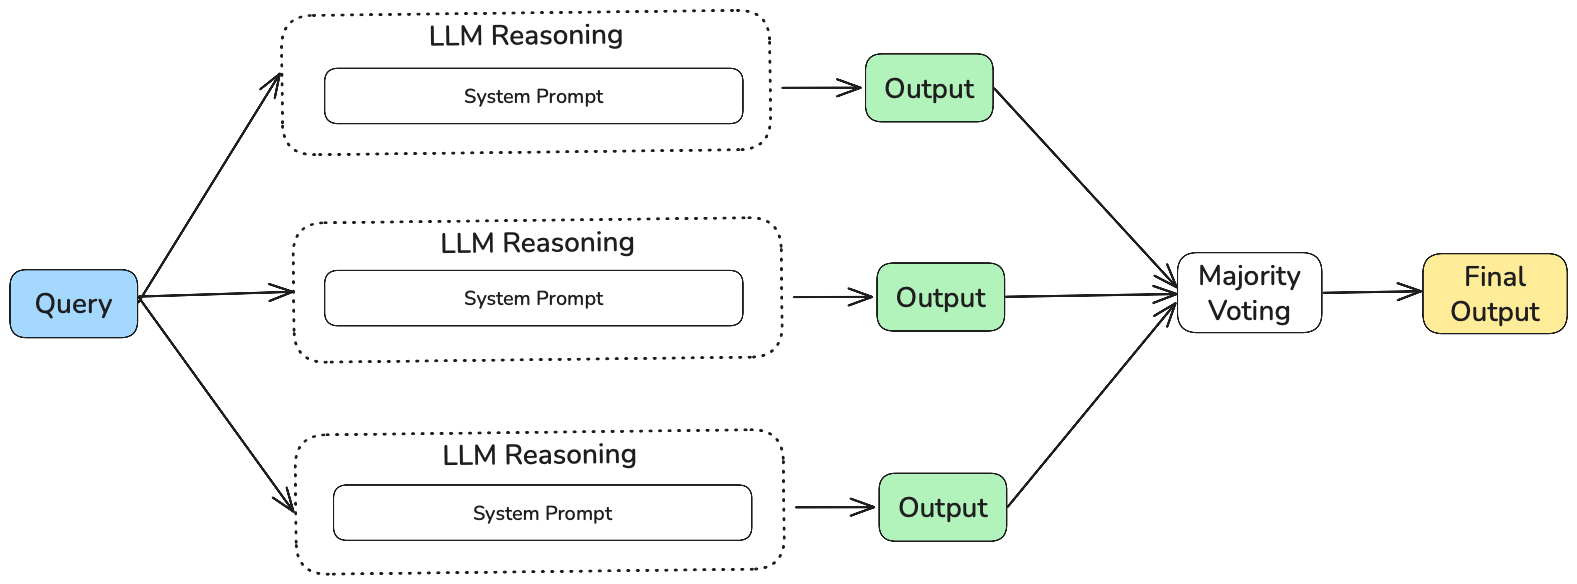

In [66]:
display(Image(filename="images/intro/SP_SC.png"))

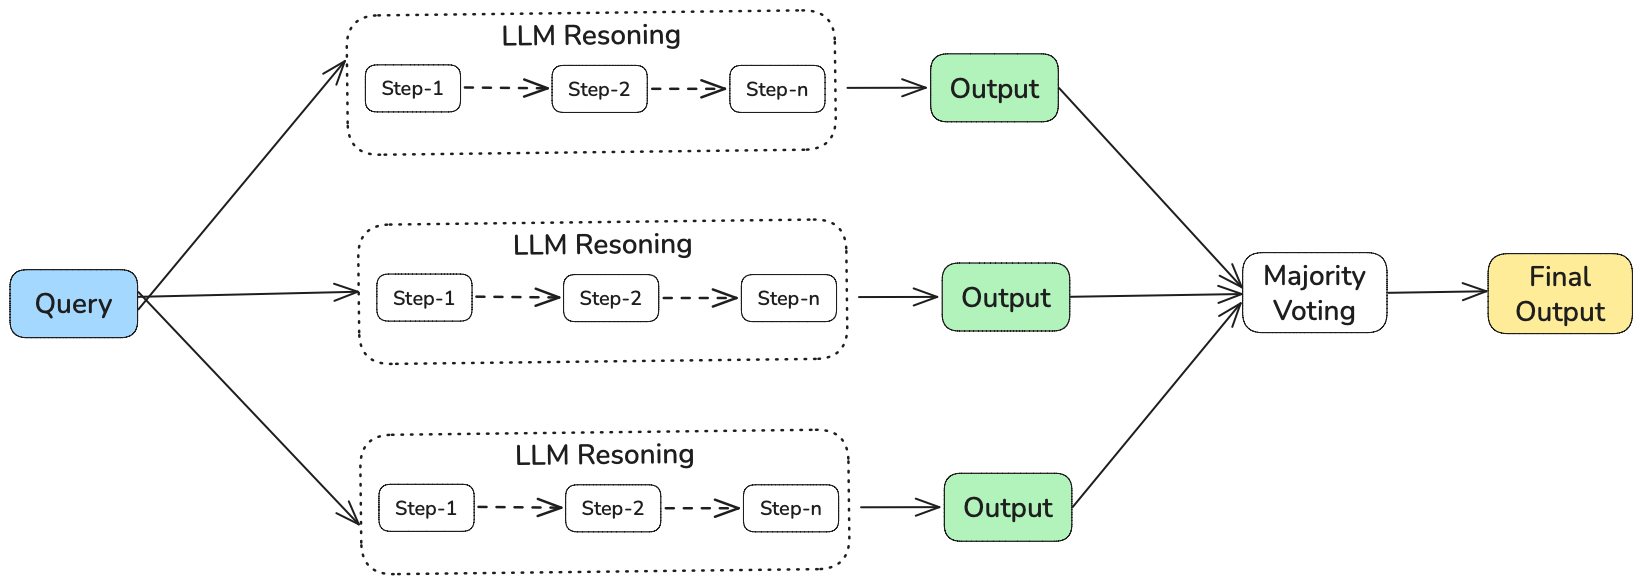

In [67]:
display(Image(filename="images/intro/CoT_SC.png"))

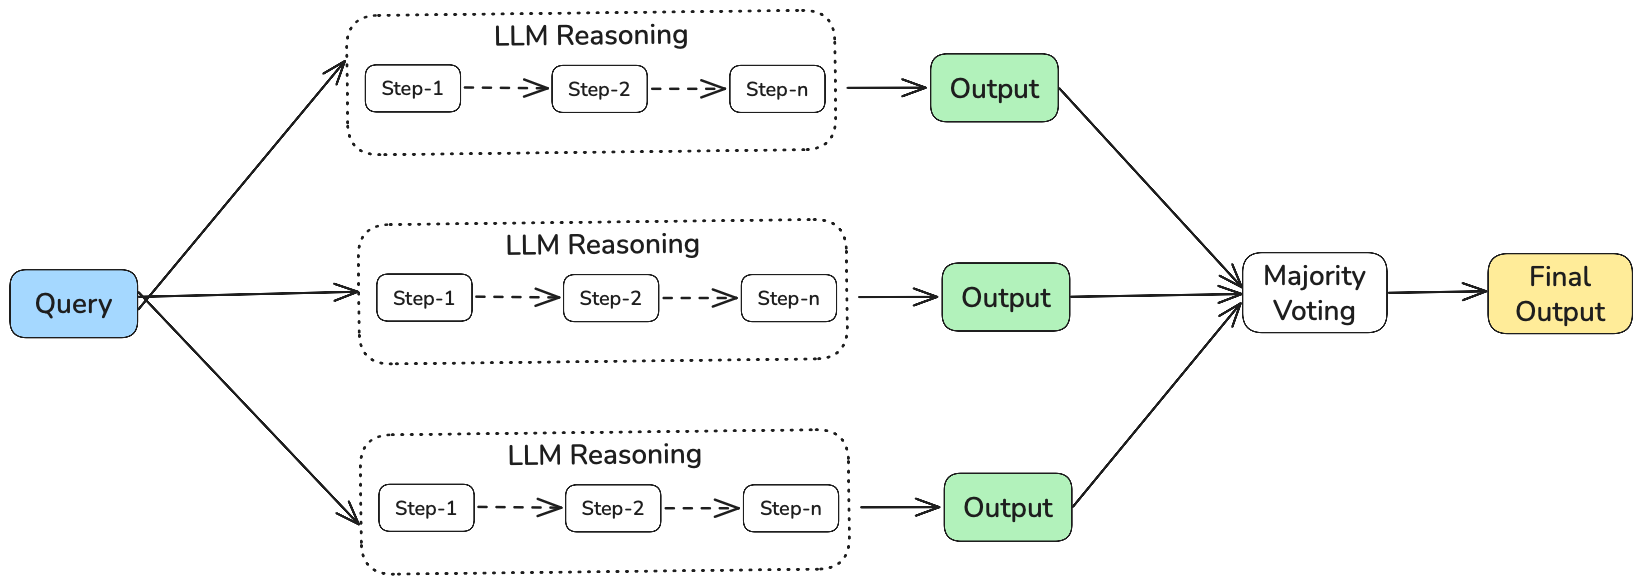

In [68]:
display(Image(filename="images/intro/UST_CoT_SC.png"))

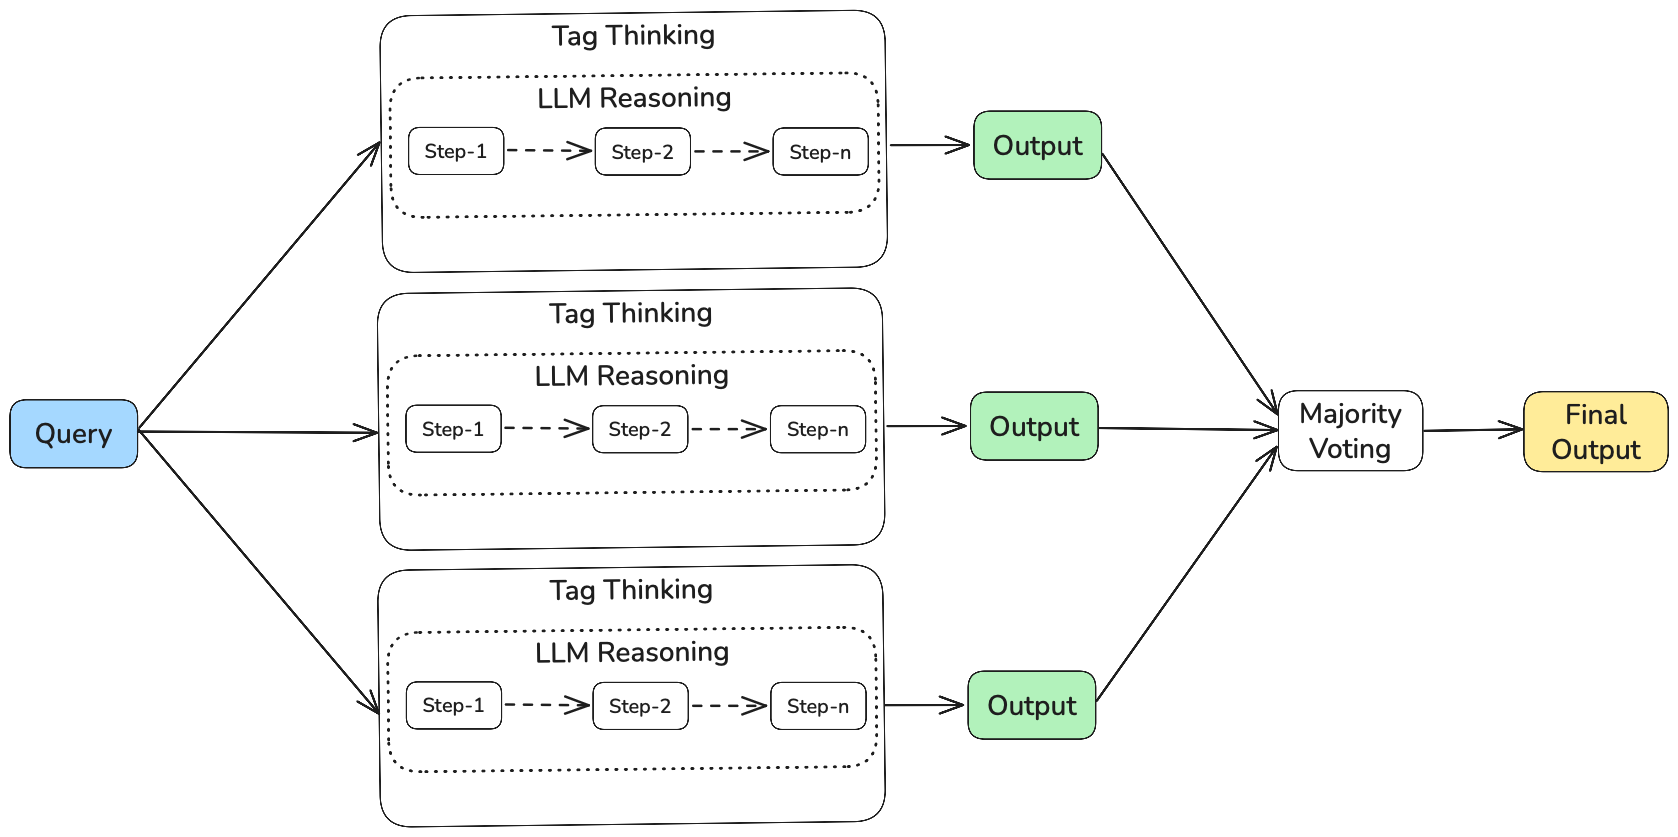

In [69]:
display(Image(filename="images/intro/ST_CoT_SC.png"))

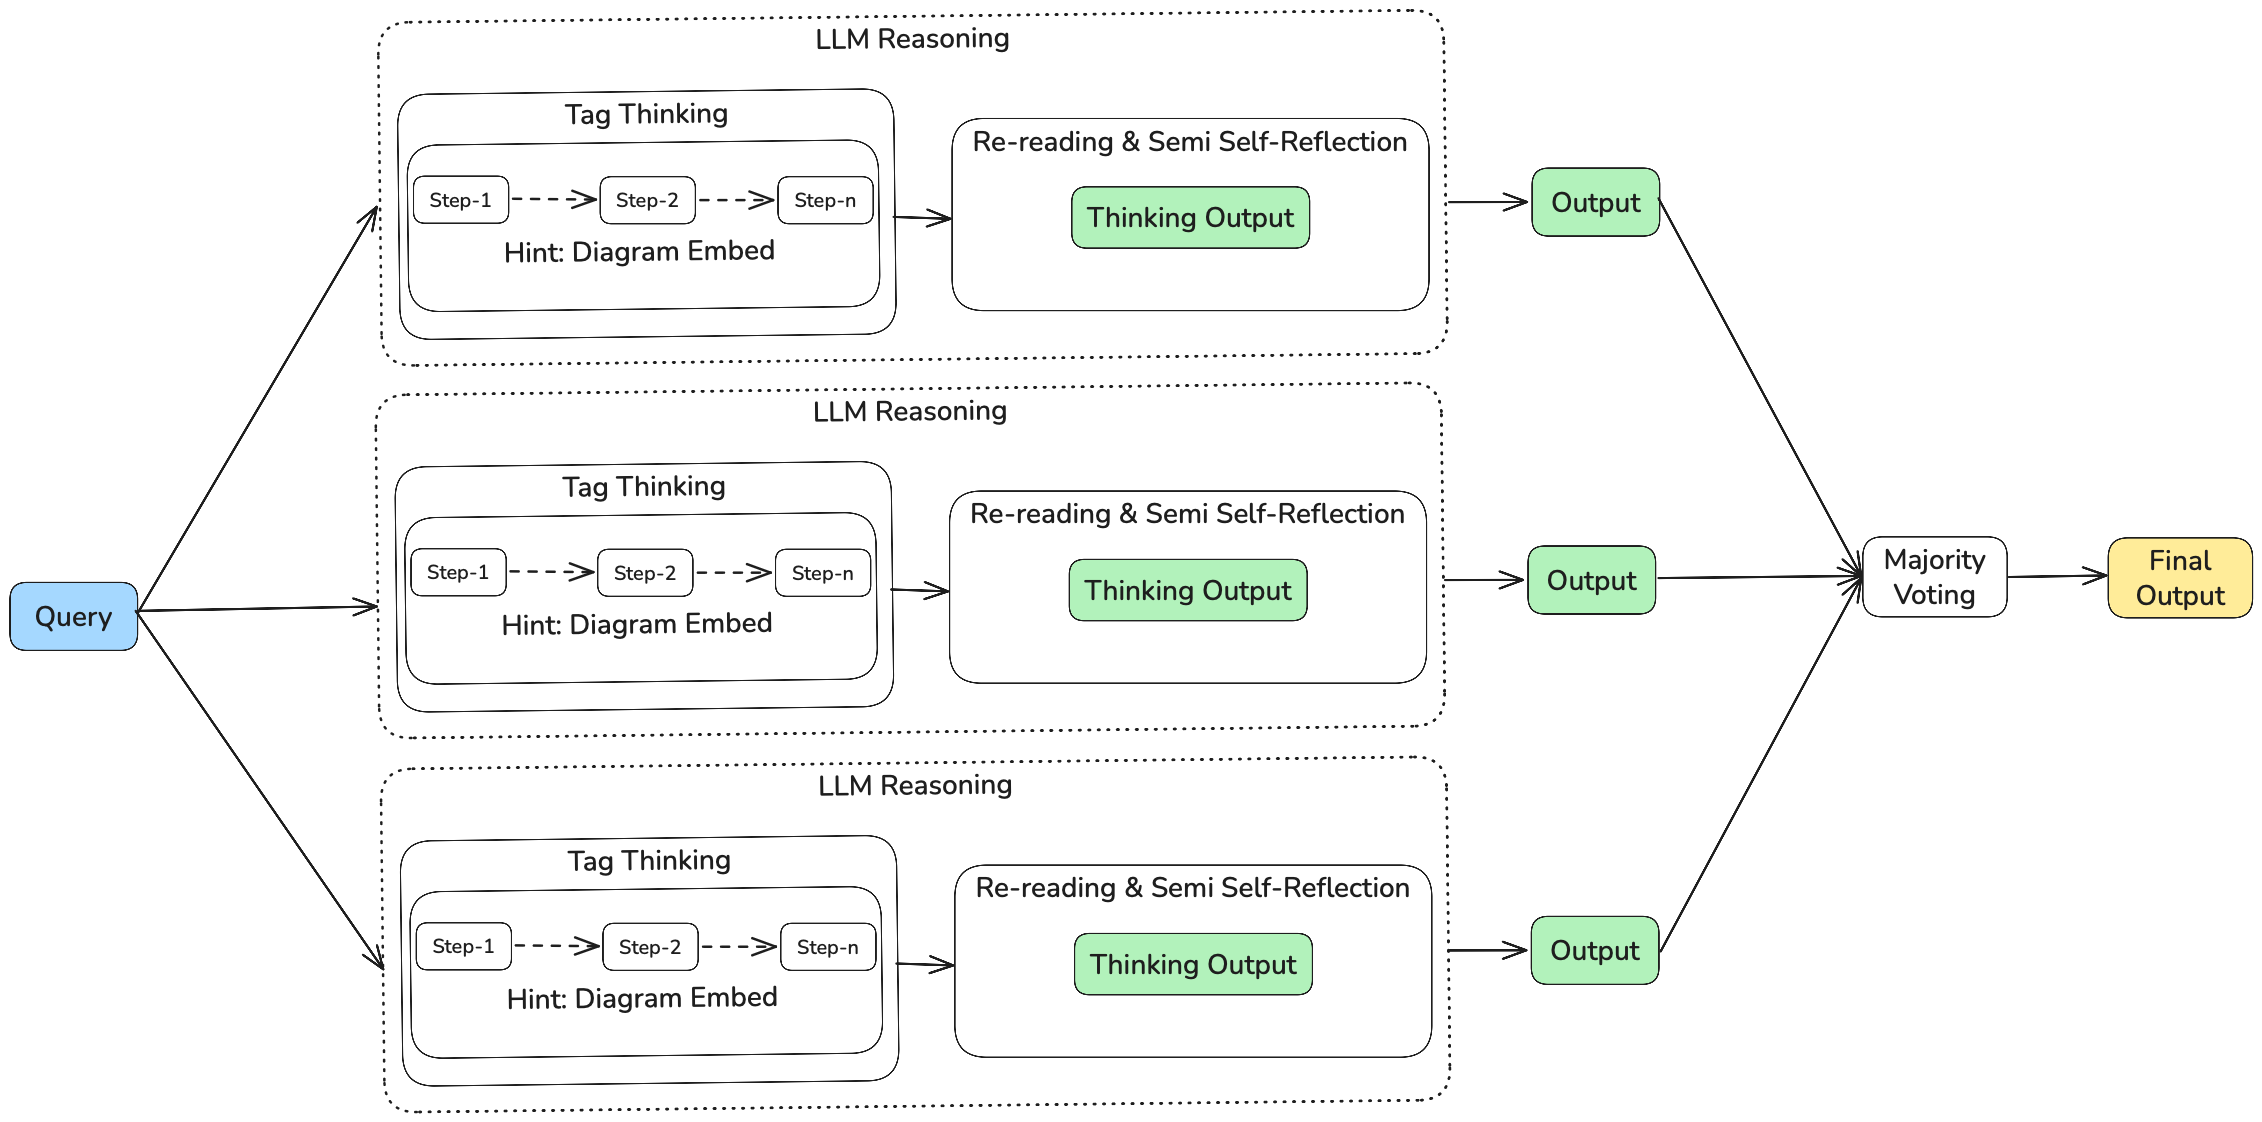

In [70]:
display(Image(filename="images/intro/FinCoT_SC.png"))